# Face detection using OpenCV

### Import resources and display image

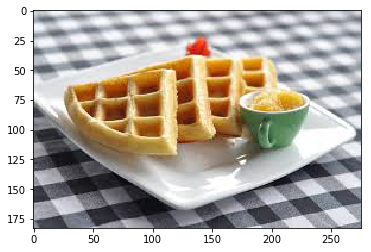

In [10]:
import os
os.chdir(r'C:\Users\atavares\PycharmProjects\ComputerVision')

# import required libraries for this section
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in the image
image = cv2.imread('data/images/waffle.jpg')

# Convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make a copy of the image
image_copy = np.copy(image)

plt.imshow(image)

## Detect corners

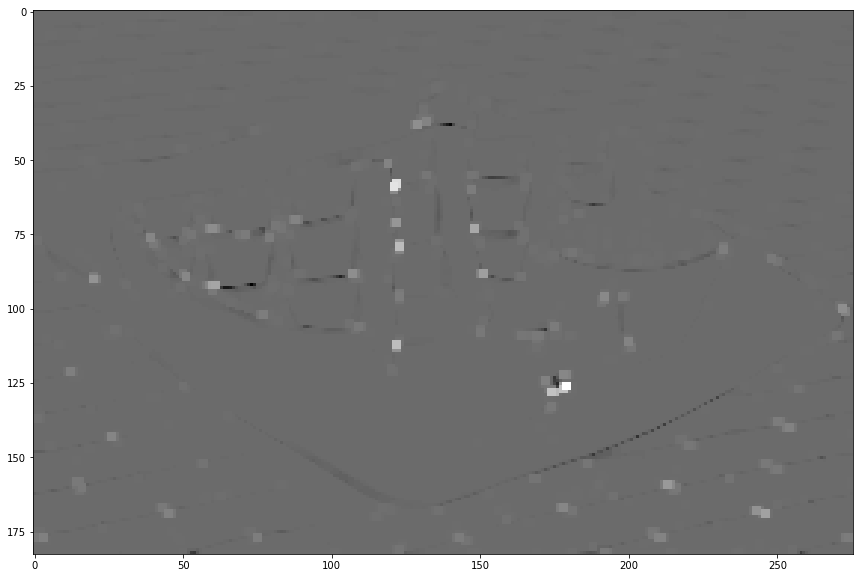

In [17]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# It uses floating point values
gray = np.float32(gray)

# Detect corners
# first value = grayscale float values
# second value = size of the neighborhood - in pixels squared
# third value = size of the sobel operator
# fourth value = a constant that helps to determine corners
dst = cv2.cornerHarris(gray, 2, 3, 0.09)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)

# Detect corners
plt.figure(figsize=(20, 10))
plt.imshow(dst, cmap='gray')

## Extract and display strong corners

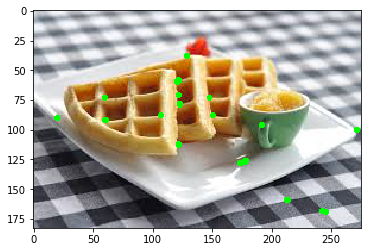

In [22]:
thresh = 0.2 * dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)